#### 📚 <span style="color:#f6f794"> Importing libraries and setting displays </span>

In [75]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import re
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

#### <span style="color:#f6f794"> Starting Kaggle API </span>

In [7]:
# Staarting Kaggle API
api = KaggleApi()
api.authenticate()

In [8]:
# Download dataset from Kaggle
!kaggle datasets download -d uciml/mushroom-classification -p datasets --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0




  0%|          | 0.00/34.2k [00:00<?, ?B/s]
100%|██████████| 34.2k/34.2k [00:00<00:00, 30.4MB/s]


#### 🐼 <span style="color:#f6f794"> Reading CSV </span>

In [9]:
# Reading the dataset
df_mushrooms = pd.read_csv('datasets/mushrooms.csv')
df_mushrooms.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 🔍 <span style="color:#f6f794"> Exploring Data </span>

#### 🙈 <span style="color:#f6f794"> Seeking for nulls </span>

In [10]:
df_mushrooms.isnull().sum() # priori no missing values
df_mushrooms.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6252,p,f,y,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
1849,e,x,f,n,t,n,f,c,b,w,...,s,g,w,p,w,o,p,k,v,d
7094,p,k,y,n,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
7132,p,k,s,e,f,f,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
4488,p,x,y,y,f,f,f,c,b,p,...,k,b,n,p,w,o,l,h,v,d


In [11]:
# By reading the documentation, we know that the dataset has missing values represented by '?', let's check it
sospechosos = ['?', '-', '', ' ', '/', 'NA', 'N/A', 'null', 'NULL', 'NaN', 'nan']

for val in sospechosos:
    print(f"\nValores '{val}' por columna:")
    print((df_mushrooms == val).sum())



Valores '?' por columna:
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Valores '-' por columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                      

In [12]:
for column in df_mushrooms.columns:
    if df_mushrooms[column].dtype == 'object':
        print(f"""Unique values in column '{column.upper()}':\nQTY: {df_mushrooms[column].nunique()} VALUES: {df_mushrooms[column].unique()}
              \n==========================================================================================""")

Unique values in column 'CLASS':
QTY: 2 VALUES: ['p' 'e']
              
Unique values in column 'CAP-SHAPE':
QTY: 6 VALUES: ['x' 'b' 's' 'f' 'k' 'c']
              
Unique values in column 'CAP-SURFACE':
QTY: 4 VALUES: ['s' 'y' 'f' 'g']
              
Unique values in column 'CAP-COLOR':
QTY: 10 VALUES: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
              
Unique values in column 'BRUISES':
QTY: 2 VALUES: ['t' 'f']
              
Unique values in column 'ODOR':
QTY: 9 VALUES: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
              
Unique values in column 'GILL-ATTACHMENT':
QTY: 2 VALUES: ['f' 'a']
              
Unique values in column 'GILL-SPACING':
QTY: 2 VALUES: ['c' 'w']
              
Unique values in column 'GILL-SIZE':
QTY: 2 VALUES: ['n' 'b']
              


Unique values in column 'GILL-COLOR':
QTY: 12 VALUES: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
              
Unique values in column 'STALK-SHAPE':
QTY: 2 VALUES: ['e' 't']
              
Unique values in column 'STALK-ROOT':
QTY: 5 VALUES: ['e' 'c' 'b' 'r' '?']
              
Unique values in column 'STALK-SURFACE-ABOVE-RING':
QTY: 4 VALUES: ['s' 'f' 'k' 'y']
              
Unique values in column 'STALK-SURFACE-BELOW-RING':
QTY: 4 VALUES: ['s' 'f' 'y' 'k']
              
Unique values in column 'STALK-COLOR-ABOVE-RING':
QTY: 9 VALUES: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
              
Unique values in column 'STALK-COLOR-BELOW-RING':
QTY: 9 VALUES: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
              
Unique values in column 'VEIL-TYPE':
QTY: 1 VALUES: ['p']
              
Unique values in column 'VEIL-COLOR':
QTY: 4 VALUES: ['w' 'n' 'o' 'y']
              
Unique values in column 'RING-NUMBER':
QTY: 3 VALUES: ['o' 't' 'n']
              
Unique values in column 'RING-TYPE

In [13]:
for column in df_mushrooms.columns:
    if df_mushrooms[column].isnull().any():
        print(f"Column '{column}' has {df_mushrooms[column].isnull().sum()} missing values.")

In [14]:
for column in df_mushrooms.columns:
    # Convert to str to avoid errors like NaN/None
    col_str = df_mushrooms[column].astype(str)

    # Values which are not exactly 1 single letter in minus a-z
    non_matching = col_str.loc[~col_str.str.fullmatch(r'[a-z]')]

    if not non_matching.empty:
        print(f"⚠️ Column '{column.upper()}' has {non_matching.shape[0]} values that don't match the pattern 'a-z' (single lowercase letter):")
        print(non_matching.value_counts())


⚠️ Column 'STALK-ROOT' has 2480 values that don't match the pattern 'a-z' (single lowercase letter):
stalk-root
?    2480
Name: count, dtype: int64


#### ☝️ <span style="color:#f6f794"> Changing values in [stalk-root] </span>

In [15]:
# Chaning '?' to NaN for easier handling of missing values
df_mushrooms["stalk-root"].replace('?', np.nan, inplace=True)

# Checking for missing values after replacement
print((df_mushrooms["stalk-root"] == '?').sum())
print(df_mushrooms["stalk-root"].isnull().sum())

0
2480


C:\Users\yaelp\AppData\Local\Temp\ipykernel_40976\1262010487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mushrooms["stalk-root"].replace('?', np.nan, inplace=True)


####  <span style="color:#f6f794"> Continue checking </span>

In [16]:
df_mushrooms.describe(include='object')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
df_mushrooms.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3671,e,f,f,e,t,n,f,c,b,u,...,s,w,w,p,w,o,p,k,v,d
5890,p,f,y,y,f,f,f,c,b,p,...,k,b,b,p,w,o,l,h,y,d
3437,p,f,y,g,f,f,f,c,b,h,...,k,p,p,p,w,o,l,h,y,p
7784,p,k,s,e,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
3561,e,f,y,g,t,n,f,c,b,p,...,s,p,g,p,w,o,p,k,y,d
4063,p,f,y,y,f,f,f,c,b,p,...,k,b,p,p,w,o,l,h,y,d
581,e,x,s,y,t,a,f,c,b,w,...,s,w,w,p,w,o,p,n,s,m
1772,e,x,f,w,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
5055,p,f,f,y,f,f,f,c,b,g,...,k,b,p,p,w,o,l,h,y,p
3210,e,f,f,e,t,n,f,c,b,w,...,s,w,g,p,w,o,p,k,v,d


#### 🗺️ <span style="color:#f6f794"> Maping Data to understand </span>

| Attribute Information | Description |
|---|---|
| **class** | edible=e, poisonous=p |
| **cap-shape**| bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s |
| **cap-surface**| fibrous=f, grooves=g, scaly=y, smooth=s |
| **cap-color**| brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y |
| **bruises**| bruises=t, no=f |
| **odor**| almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |
| **gill-attachment**| attached=a, descending=d, free=f, notched=n |
| **gill-spacing**| close=c, crowded=w, distant=d |
| **gill-size**| broad=b, narrow=n |
| **gill-color**| black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
| **stalk-shape**| enlarging=e, tapering=t |
| **stalk-root**| bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? |
| **stalk-surface-above-ring**| fibrous=f, scaly=y, silky=k, smooth=s |
| **stalk-surface-below-ring**| fibrous=f, scaly=y, silky=k, smooth=s |
| **stalk-color-above-ring**| brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| **stalk-color-below-ring**| brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| **veil-type**| partial=p, universal=u |
| **veil-color**| brown=n, orange=o, white=w, yellow=y |
| **ring-number**| none=n, one=o, two=t |
| **ring-type**| cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
| **spore-print-color**| black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y |
| **population**| abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y |
| **habitat**| grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d |

In [18]:
attribute_mappings = {
    'class': {
        'e': 'edible',
        'p': 'poisonous'
    },
    'cap-shape': {
        'b': 'bell',
        'c': 'conical',
        'x': 'convex',
        'f': 'flat',
        'k': 'knobbed',
        's': 'sunken'
    },
    'cap-surface': {
        'f': 'fibrous',
        'g': 'grooves',
        'y': 'scaly',
        's': 'smooth'
    },
    'cap-color': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'r': 'green',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'bruises': {
        't': 'bruises',
        'f': 'no'
    },
    'odor': {
        'a': 'almond',
        'l': 'anise',
        'c': 'creosote',
        'y': 'fishy',
        'f': 'foul',
        'm': 'musty',
        'n': 'none',
        'p': 'pungent',
        's': 'spicy'
    },
    'gill-attachment': {
        'a': 'attached',
        'd': 'descending',
        'f': 'free',
        'n': 'notched'
    },
    'gill-spacing': {
        'c': 'close',
        'w': 'crowded',
        'd': 'distant'
    },
    'gill-size': {
        'b': 'broad',
        'n': 'narrow'
    },
    'gill-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'g': 'gray',
        'r': 'green',
        'o': 'orange',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-shape': {
        'e': 'enlarging',
        't': 'tapering'
    },
    'stalk-root': {
        'b': 'bulbous',
        'c': 'club',
        'u': 'cup',
        'e': 'equal',
        'z': 'rhizomorphs',
        'r': 'rooted',
        '?': 'missing'
    },
    'stalk-surface-above-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-surface-below-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-color-above-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-color-below-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'veil-type': {
        'p': 'partial',
        'u': 'universal'
    },
    'veil-color': {
        'n': 'brown',
        'o': 'orange',
        'w': 'white',
        'y': 'yellow'
    },
    'ring-number': {
        'n': 'none',
        'o': 'one',
        't': 'two'
    },
    'ring-type': {
        'c': 'cobwebby',
        'e': 'evanescent',
        'f': 'flaring',
        'l': 'large',
        'n': 'none',
        'p': 'pendant',
        's': 'sheathing',
        'z': 'zone'
    },
    'spore-print-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'r': 'green',
        'o': 'orange',
        'u': 'purple',
        'w': 'white',
        'y': 'yellow'
    },
    'population': {
        'a': 'abundant',
        'c': 'clustered',
        'n': 'numerous',
        's': 'scattered',
        'v': 'several',
        'y': 'solitary'
    },
    'habitat': {
        'g': 'grasses',
        'l': 'leaves',
        'm': 'meadows',
        'p': 'paths',
        'u': 'urban',
        'w': 'waste',
        'd': 'woods'
    }
}


In [19]:
def decode_feature(value, feature_name):
    """Decode a feature using the mapping dictionary"""
    return attribute_mappings[feature_name].get(value, value)

# Transfor all dataframe
def decode_dataframe(df):
    df_mapped = df.copy()

    for column in df.columns:
        if column in attribute_mappings:
            df_mapped[column] = df_mapped[column].apply(lambda x: decode_feature(x, column))
    return df_mapped

df_mapped = decode_dataframe(df_mushrooms)

In [20]:
for column in df_mapped.columns:
    if df_mapped[column].dtype == 'object':
        print(f"""Unique values in column '{column.upper()}':\nQTY: {df_mapped[column].nunique()} VALUES: {df_mapped[column].unique()}
              \n==========================================================================================""")

Unique values in column 'CLASS':
QTY: 2 VALUES: ['poisonous' 'edible']
              
Unique values in column 'CAP-SHAPE':
QTY: 6 VALUES: ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
              
Unique values in column 'CAP-SURFACE':
QTY: 4 VALUES: ['smooth' 'scaly' 'fibrous' 'grooves']
              
Unique values in column 'CAP-COLOR':
QTY: 10 VALUES: ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
              
Unique values in column 'BRUISES':
QTY: 2 VALUES: ['bruises' 'no']
              
Unique values in column 'ODOR':
QTY: 9 VALUES: ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
              
Unique values in column 'GILL-ATTACHMENT':
QTY: 2 VALUES: ['free' 'attached']
              
Unique values in column 'GILL-SPACING':
QTY: 2 VALUES: ['close' 'crowded']
              
Unique values in column 'GILL-SIZE':
QTY: 2 VALUES: ['narrow' 'broad']
              
Unique values in column 'GILL-COLOR':
QTY:

#### 🎯 <span style="color:#f6f794"> Looking for non relevant information columns </span>

In [21]:
len(df_mapped["veil-type"]) # 8124
len(df_mapped["veil-type"].unique()) # 1

1

This column is irrelevant because it has only one value therefore it doesn't bring anything to the table.

In [22]:
df_mapped.drop(columns=['veil-type'], inplace=True)

#### 👍 <span style="color:#f6f794"> Studying if we can impute values in [stalk-root] </span>

In [23]:
print((df_mapped["stalk-root"].value_counts(dropna=False, normalize=True) * 100).round(2).astype(str) + " %") # 30.53 % are null

stalk-root
bulbous    46.48 %
NaN        30.53 %
equal      13.79 %
club        6.84 %
rooted      2.36 %
Name: proportion, dtype: object


<Axes: xlabel='class', ylabel='count'>

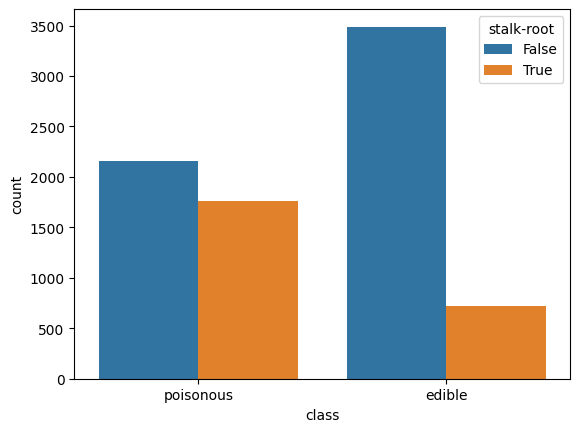

In [24]:
# Visualizing the NaN values in 'stalk-root' column's distribution
sns.countplot(x=df_mapped["class"], hue=df_mapped["stalk-root"].isna())

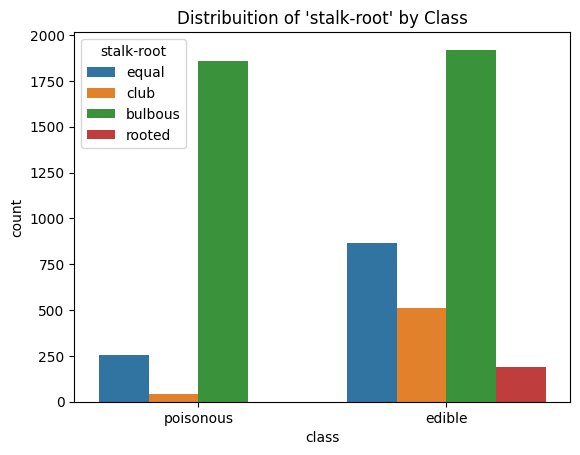

In [25]:
# Visualizing the distribution of 'stalk-root' by class
sns.countplot(x="class", hue="stalk-root", data=df_mapped)
plt.title("Distribuition of 'stalk-root' by Class")
plt.legend(title="stalk-root")
plt.xticks(rotation=0)
plt.show()

#### 👌 <span style="color:#f6f794"> Imputing by the mode but grouping it by [class] </span>

In [26]:
# Imputing missing values in 'stalk-root' based on the mode of each class
df_mapped["stalk-root"] = df_mapped.groupby("class")["stalk-root"].transform(lambda x: x.fillna(x.mode()[0]))

Después de imputar:
stalk-root
bulbous    77.0
equal      13.8
club        6.8
rooted      2.4
Name: proportion, dtype: float64


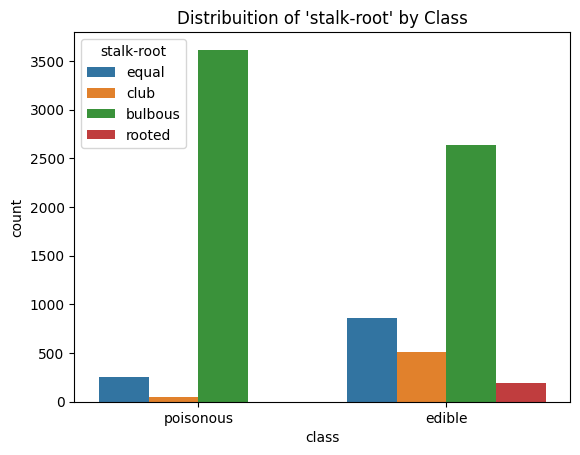

In [27]:
print("Después de imputar:")
print(df_mapped["stalk-root"].value_counts(normalize=True).round(3) * 100)

# Visualizing the distribution of 'stalk-root' by class
sns.countplot(x="class", hue="stalk-root", data=df_mapped)
plt.title("Distribuition of 'stalk-root' by Class")
plt.legend(title="stalk-root")
plt.xticks(rotation=0)
plt.show()


#### 💪🏋️‍♀️ <span style="color:#f6f794"> Checking strong correlated values [class] </span>

In [29]:
def cramers_v(x, y):
    """Calcula Cramér's V para dos variables categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  # corrección de bias
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calcular Cramér's V entre cada columna categórica y la variable objetivo
cramers_scores = {}
for col in df_mapped.columns:
    if col != 'class': # Excluding the target variable "class"
        cramers_scores[col] = cramers_v(df_mapped[col], df_mapped['class'])

# Convertir en DataFrame ordenado por relevancia
cramers_df = pd.DataFrame.from_dict(cramers_scores, orient='index', columns=['Cramers_V'])
cramers_df = cramers_df.sort_values(by='Cramers_V', ascending=False)

print(cramers_df)

                          Cramers_V
odor                       0.970558
spore-print-color          0.752036
gill-color                 0.679877
ring-type                  0.602900
stalk-surface-above-ring   0.587666
stalk-surface-below-ring   0.574551
gill-size                  0.539677
stalk-color-above-ring     0.523943
stalk-color-below-ring     0.513799
bruises                    0.501188
population                 0.486775
habitat                    0.439323
stalk-root                 0.360578
gill-spacing               0.347897
cap-shape                  0.244330
cap-color                  0.215889
ring-number                0.214212
cap-surface                0.195997
veil-color                 0.152222
gill-attachment            0.127951
stalk-shape                0.101170


#### 💪🏋️‍♀️ <span style="color:#f6f794"> Iterpreting Cramer's values [class] </span>

| Cramer's V | Interpretation                 |
| ---------- | ------------------------------ |
| 0.0 – 0.1  | Very weak or irrelevant        |
| 0.1 – 0.3  | Weak but potentially usefull   |
| 0.3 – 0.5  | Moderated                      |
| 0.5 – 1.0  | Strong                         |


In [30]:
weak_features = ['cap-shape', 'cap-color', 'ring-number', 'cap-surface', 'veil-color', 'gill-attachment', 'stalk-shape']

df_strong = df_mapped.drop(columns=weak_features).copy()
df_strong = df_strong.drop(columns="class", axis=1)
df_strong.columns

Index(['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### 👁️ <span style="color:#f6f794"> Visualizing Cramer's values correlation [class] </span>


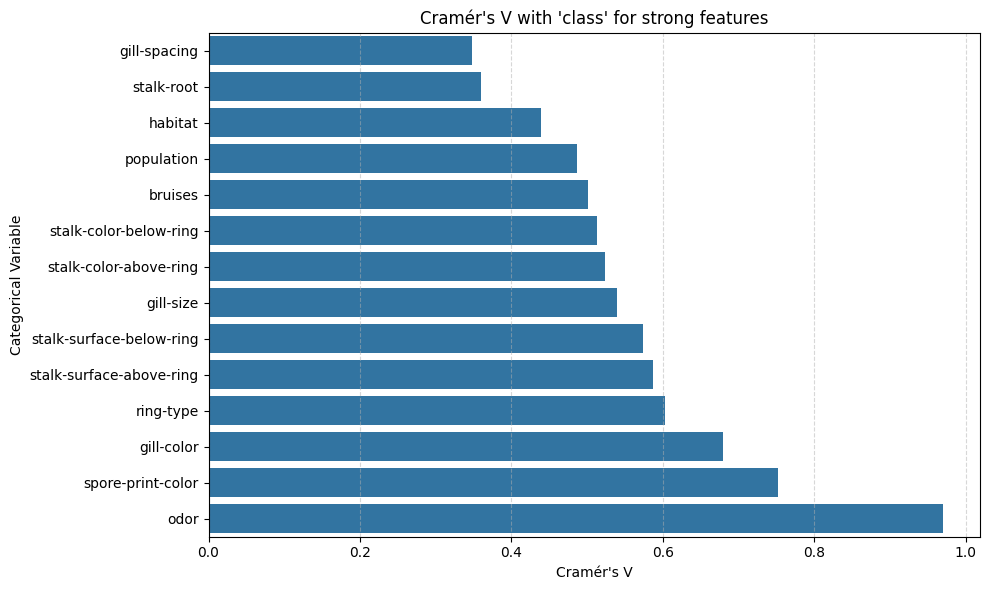

In [31]:
cols_to_plot = df_strong.columns 
cramers_subset = cramers_df.loc[cols_to_plot]

# Ordenamos por valor para graficar
cramers_subset = cramers_subset.sort_values(by='Cramers_V', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cramers_subset.reset_index(),
    y='index',
    x='Cramers_V'
)
plt.title("Cramér's V with 'class' for strong features")
plt.xlabel("Cramér's V")
plt.ylabel("Categorical Variable")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

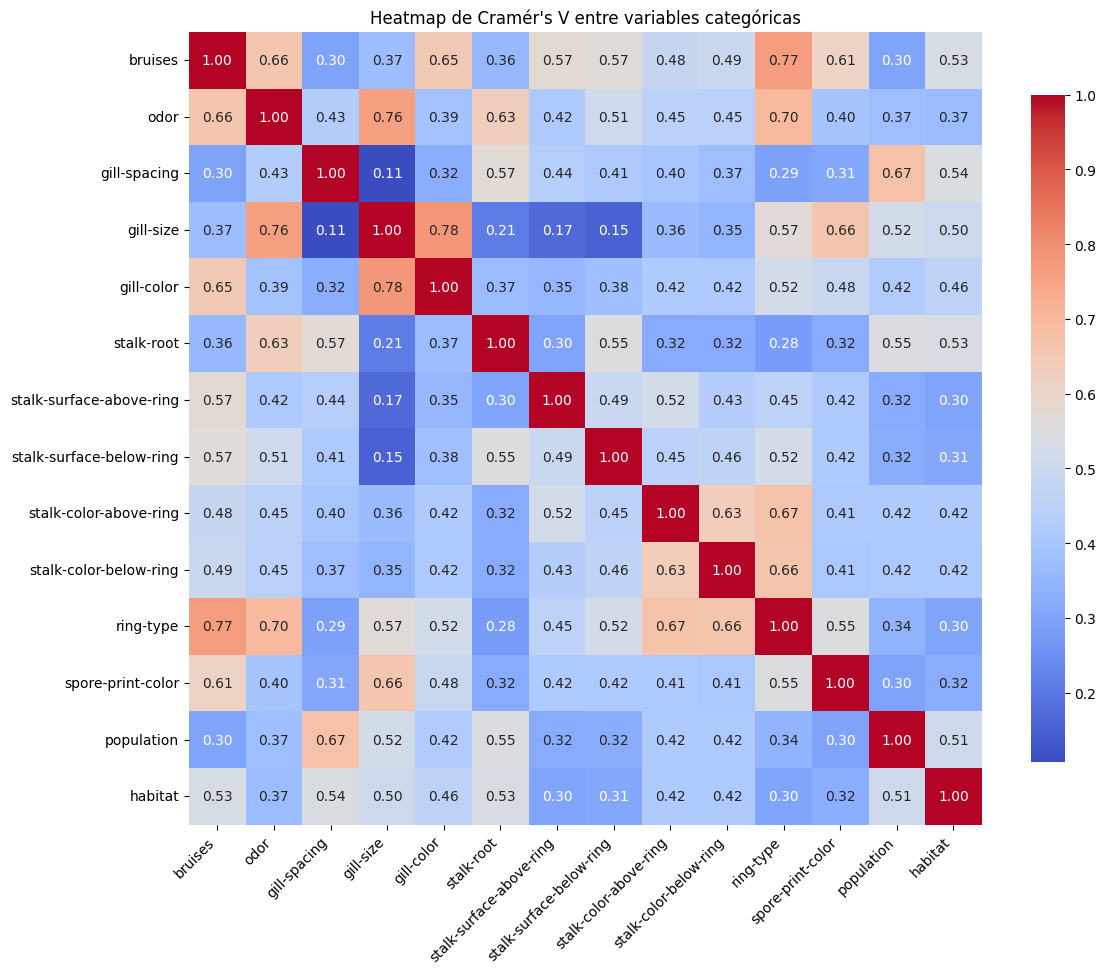

In [41]:
def cramers_v(x, y): # Función para calcular el Cramér's V corregido entre dos variables categóricas
    
    confusion_matrix = pd.crosstab(x, y) # Construye la tabla de contingencia (frecuencias cruzadas) entre x e y
    
    chi2 = chi2_contingency(confusion_matrix)[0] # Calcula el estadístico chi-cuadrado para la tabla de contingencia
    n = confusion_matrix.sum().sum()  # Número total de observaciones en la tabla
    phi2 = chi2 / n # Calcula phi2: chi2 normalizado por el total de observaciones
    r, k = confusion_matrix.shape  # Número de filas (categorías de x) y columnas (categorías de y)
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1)) # Corrección de phi2 para tablas con muchas categorías o muestras pequeñas
    
    rcorr = r - ((r - 1)**2) / (n - 1) # Corrección en los grados de libertad para filas y columnas
    kcorr = k - ((k - 1)**2) / (n - 1)
    
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))) # Calcula y devuelve el Cramér's V corregido

cols = df_strong.columns # Lista de columnas con variables seleccionadas (fuertes)
n = len(cols) # Número de variables que vamos a comparar
matriz_cramers = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols) # Creamos un DataFrame vacío para almacenar los valores de Cramér's V entre pares

for i in range(n):# Recorremos todas las combinaciones únicas de variables para calcular Cramér's V
    for j in range(i, n):
        
        v = cramers_v(df_strong[cols[i]], df_strong[cols[j]]) # Calculamos el Cramér's V entre la variable i y la j
        matriz_cramers.iloc[i, j] = v # Guardamos el resultado en la matriz (parte superior)
        
        matriz_cramers.iloc[j, i] = v # Copiamos el valor a la parte inferior para mantener simetría

# print(matriz_cramers)

plt.figure(figsize=(12, 10))  # Ajusta tamaño de la figura para que se vea bien

# Mapa de calor con anotaciones de los valores (redondeados a 2 decimales)
sns.heatmap(matriz_cramers, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

plt.title("Heatmap de Cramér's V entre variables categóricas")
plt.xticks(rotation=45, ha="right")  # Gira etiquetas de eje x para mejor lectura
plt.yticks(rotation=0)  # Eje y sin rotación

plt.tight_layout()
plt.show()

In [39]:
df_strong.columns

Index(['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### 👁️ <span style="color:#f6f794"> Reducing columns based on redundancy and correlation in V Cramer's heatmap </span>

By looking at the heatmap, the below are the "to keep" columns

In [ ]:
# Columns to keep

columns_to_keep = ['bruises', 'odor', 'gill-spacing', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-surface-above-ring', 'ring-type', 'spore-print-color', 'population', 'habitat']

#### 🧨 <span style="color:#f6f794"> One-Hot Encoding </span>

In [48]:
# Variables reducidas
columns_to_keep = ['bruises', 'odor', 'gill-spacing', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-surface-above-ring', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Selecting columns to keep
df_selected = df_strong[columns_to_keep]

# Starting OneHotEncoder using drop='first' to avoid multicollinearity
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply One-Hot Encoding (returns numpy array)
encoded_array = encoder.fit_transform(df_selected)

# Creating new dataframe with encoded features
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_keep))


#### ✂️ <span style="color:#f6f794"> Separating by predict and to predict variables [class] </span>

- edible: 0
- poisonous: 1


In [52]:
# Creating new dataframe in order not to lose the df_mapped, since this is only to encode the target and separate the target from the predictors
df_target_encoded = df_mapped.copy()

# Codification the target variable 'class' separately than the features
df_target_encoded['class_encoded'] = df_target_encoded['class'].map({'edible': 0, 'poisonous': 1})

In [53]:
# The variable [class] is the target variable, which indicates whether the mushroom is edible or poisonous.
y = df_target_encoded["class_encoded"]

# The rest of the columns are features that describe the characteristics of the mushrooms.
X = df_encoded

#### ✂️ <span style="color:#f6f794"> Spliting dataset for training and testing </span>

- train: 80%
- test: 20%

In [ ]:
# Division for training with stratified sampling to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,             # 20% for testing
    stratify=y,                # To maintain the balance of the distribution of the target variable
    random_state=42            # para reproducibilidad
)

In [ ]:
print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("\n")
print("Distribution for y_train:", y_train.value_counts(normalize=True).round(2))
print("Distributi y_test: ", y_test.value_counts(normalize=True).round(2))
# It is well balanced

Shape X_train: (6499, 58)
Shape X_test:  (1625, 58)


Distribution for y_train: class_encoded
0    0.52
1    0.48
Name: proportion, dtype: float64
Distributi y_test:  class_encoded
0    0.52
1    0.48
Name: proportion, dtype: float64


#### 🎯 <span style="color:#f6f794"> Applying PCA </span>

- In order to reduce components since there are a lot after the OneHotEncoding
- 2 components is not nearly enough, this not even explain the 20% of the variance which means they points are far away from the mean. 
- Checking more components:
    - 22 components are apparently needed to explain the variance

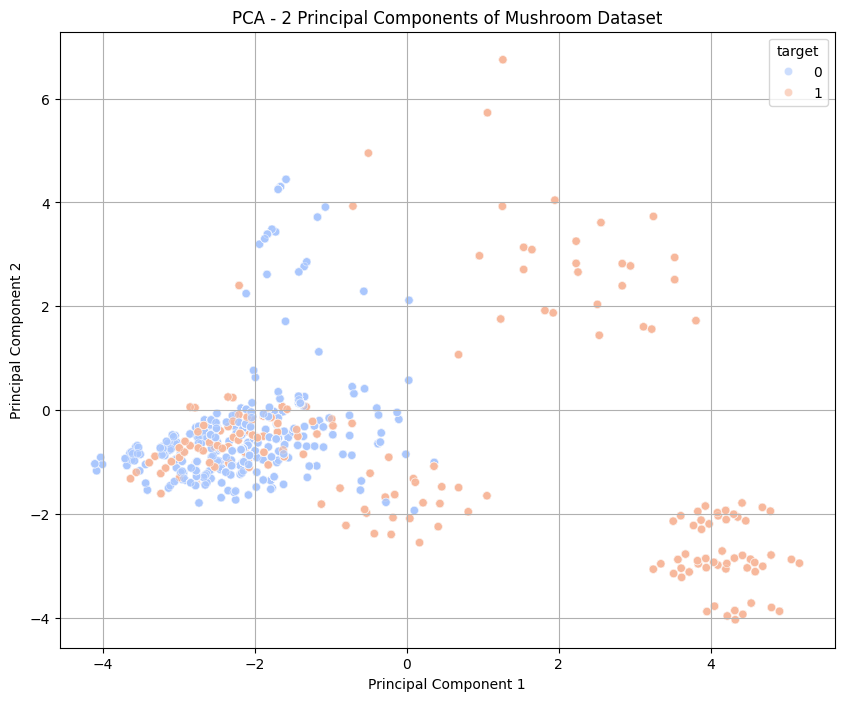

Variance explained for each component: [0.11662873 0.07605272]
Total variance explained (2 components): 0.19268144772688556


In [ ]:
# 1. Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Appliying PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Creating dataframe with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y.values  # Adding the target variable to the PCA results

# 4. Visualization of the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='coolwarm', alpha=0.6)
plt.title('PCA - 2 Principal Components of Mushroom Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("Variance explained for each component:", pca.explained_variance_ratio_)
print("Total variance explained (2 components):", pca.explained_variance_ratio_.sum())

#### <span style="color:#f6f794"> After checking, apparently 22 components are needed to explain the 80% of the variance </span>

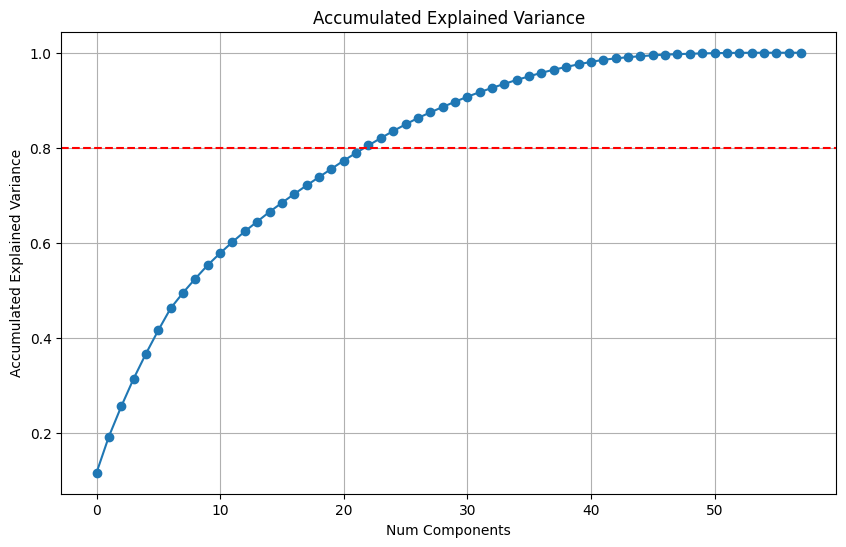

In [ ]:
# Exploring the qty of components are needed to explain a certain amount of variance
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Accumulated Explained Variance')
plt.xlabel('Num Components')
plt.ylabel('Accumulated Explained Variance')
plt.grid(True)
plt.show()
# Apparently 22 components are needed to explain 80% of the variance

#### 👯 <span style="color:#f6f794"> K means </span>

Adjusted Rand Index: 0.64 (1.0 is perfect, 0.0 is random)


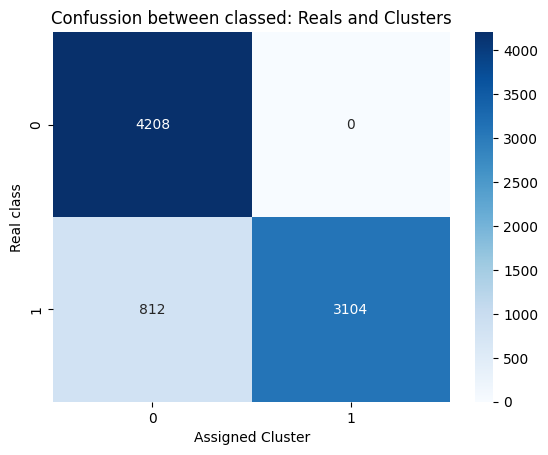

In [74]:
# 22 components
pca = PCA(n_components=22)
X_pca_22 = pca.fit_transform(X_scaled)

# K-Means with 2 clusters (there are 2 classes: edible, poisonous)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca_22)

# Here we evaluate the clustering results by how similar the clusters are to the actual classes of the mushrooms.
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.2f} (1.0 is perfect, 0.0 is random)")

# 3. Matriz de confusión para ver cómo se alinean
conf_matrix = confusion_matrix(y, clusters)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confussion between classed: Reals and Clusters")
plt.xlabel("Assigned Cluster")
plt.ylabel("Real class")
plt.show()


#### 🌳 <span style="color:#f6f794"> Random Forest </span>

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



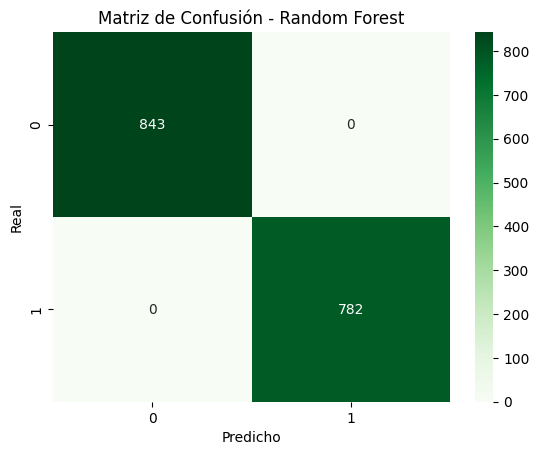

In [ ]:
# 1. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca_22, y, test_size=0.2, random_state=42)

# 2. Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 3. Evaluar
y_pred = rf.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=["edible", "poisonous"]))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


K means Interpretation

| Valor ARI | Interpretación                                                          |
| --------- | ----------------------------------------------------------------------- |
| 1.0       | Separación perfecta: los clusters son exactamente las clases reales. 🔥 |
| 0.5–0.9   | Buena separación. Algo de mezcla, pero útil. 👍                         |
| 0.0–0.5   | Poca coincidencia: K-Means no captó bien las clases reales. 🤔          |
| 0.0       | Coincidencia completamente aleatoria. 😵                                |


Random Forest - Interpretation

| Métrica       | Significado                                                                            |
| ------------- | -------------------------------------------------------------------------------------- |
| **Precision** | ¿De las predicciones que hice, cuántas fueron correctas?                               |
| **Recall**    | ¿De los verdaderos positivos, cuántos logré detectar?                                  |
| **F1-Score**  | Promedio entre Precision y Recall (balance). Ideal para datos desbalanceados.          |
| **Accuracy**  | Total de predicciones correctas / total general. Útil si las clases están balanceadas. |
